 
Size of the data: ( 12856 ,  26 ,  3 )


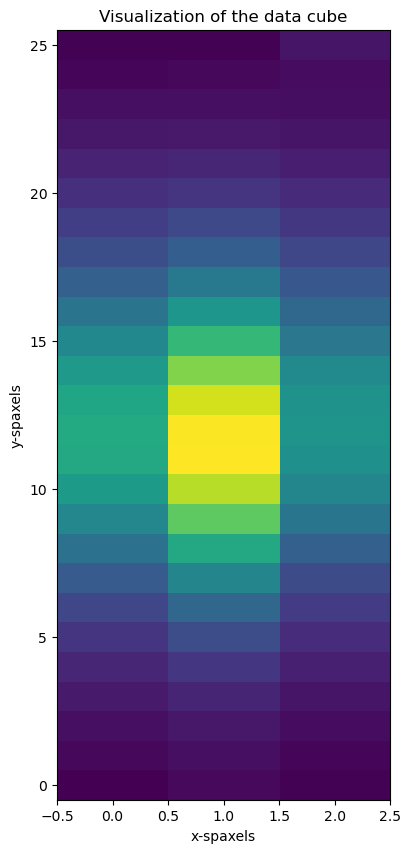

In [9]:
import FunctionsDiskIntegrate as di
import numpy as np 
import matplotlib.pyplot as plt

data, wave, pix_x, pix_y, dx, dy = di.visualize("Data\FEIGE-110_onoff_IFU_FLUX_IFU_MERGE3D_DATA_OBJ_UVB.fits")

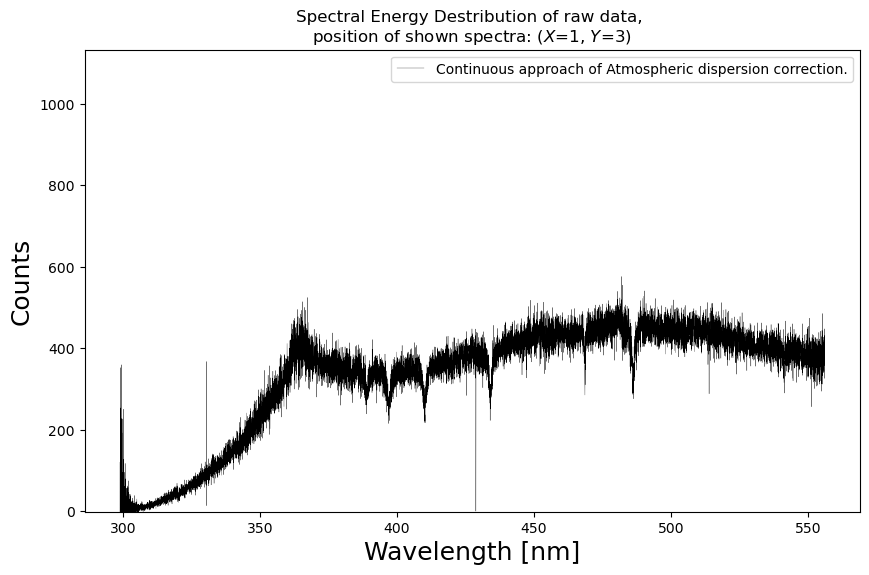

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

X = 1 # Posición horizontal del pixel que se le busca el espectro, va de 0 a 2
Y = 3 # Posición vertical del pixel que se le busca el espectro, va de 0 a 25

ylim = np.nanmedian(data[:, Y, X])*3

axes.set_title("Spectral Energy Destribution of raw data, \nposition of shown spectra: ($X$=" + str(X) + ", $Y$=" + str(Y) + ")")
axes.plot(wave, data[:, Y, X], c="k", linewidth=.2, alpha=1, label="Continuous approach of Atmospheric dispersion correction.")
axes.set_ylabel("Counts", fontsize=18)
axes.set_xlabel("Wavelength [nm]", fontsize=18)

axes.set_ylim(-1, ylim)
#axes.set_xlim(295, 555)

axes.grid(False)
axes.legend()

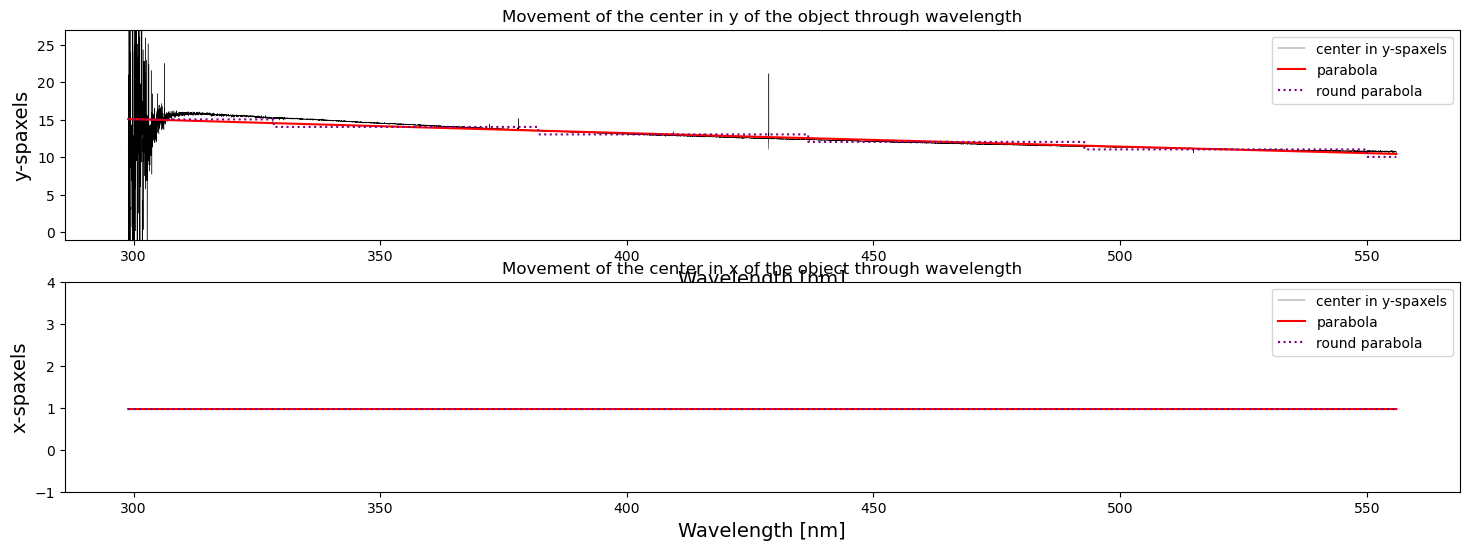

 
Center of the object: (y, x) = ( 10 ,  1 )
previous center (before the correction): (y, x) = ( 15 ,  1 )


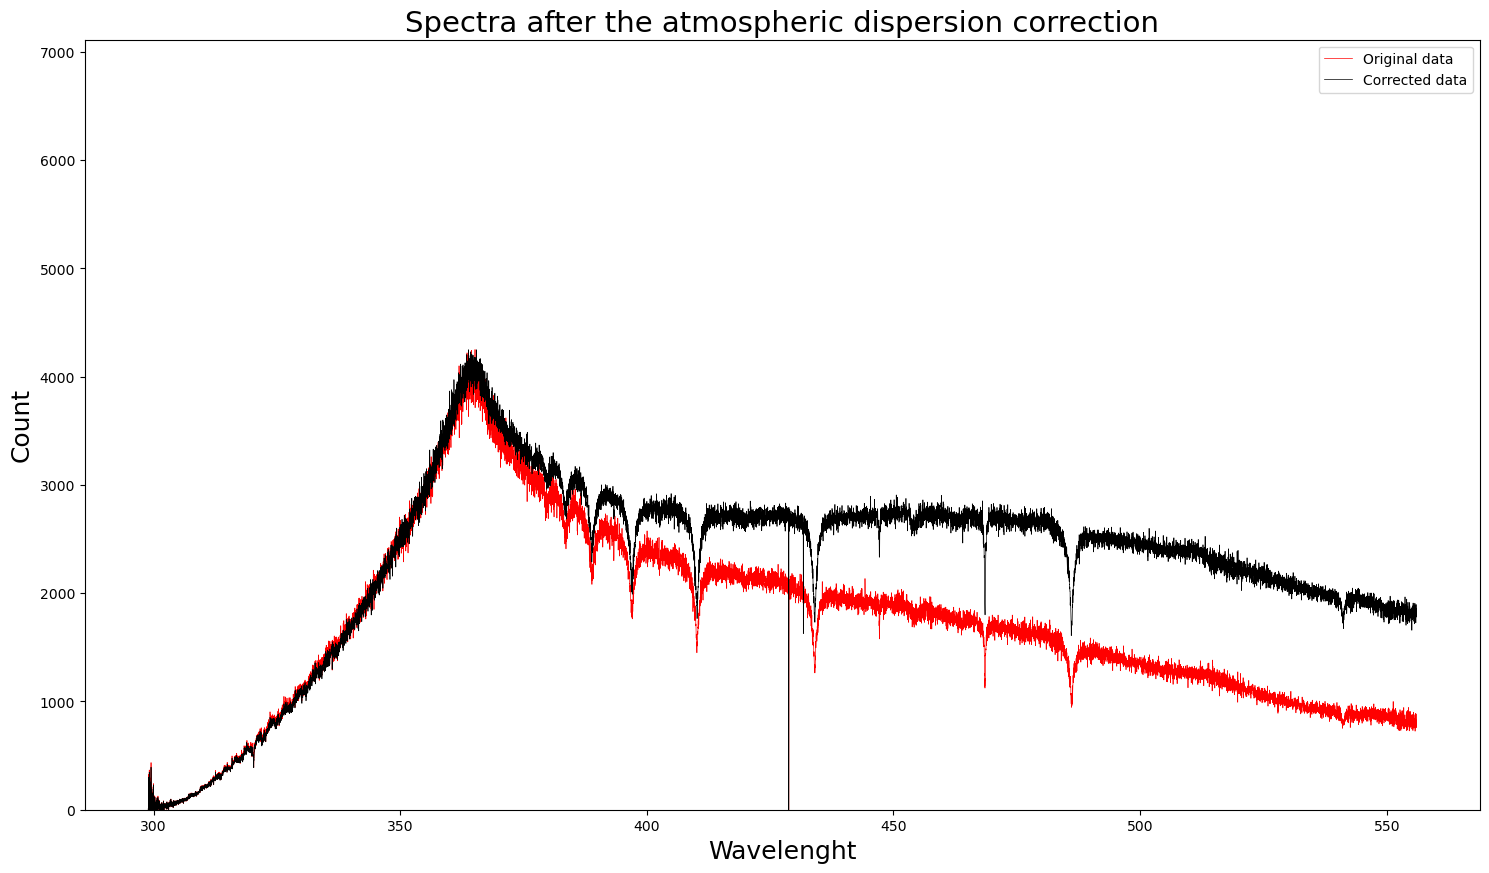

In [15]:
corrected_data, center =di.Atmospheric_dispersion_correction(" ", data, wave, 
                                     center_x=False, 
                                     center_y=True, 
                                     range_x=None, 
                                     range_y=None, 
                                     plots=True, 
                                     max_plots=3)

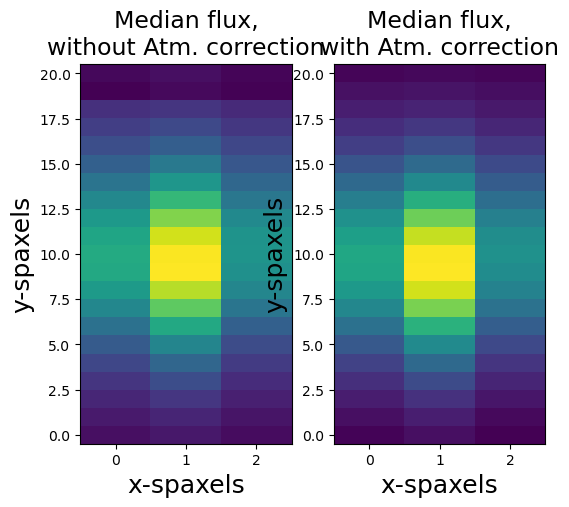

In [24]:
new_length = len(corrected_data[0, :, 0])
median_raw = np.zeros((new_length, pix_x))
difference = (pix_y - new_length) //2

fig, axes = plt.subplots(1, 2, figsize=(6, 6))
for i in range(pix_x):
    for j in range(new_length):
        median_raw[j - difference, i] = np.nanpercentile(data[:, j, i], 50)

axes[0].imshow(median_raw, aspect=0.25641,  origin="lower")
axes[0].set_ylabel("y-spaxels", fontsize=18)
axes[0].set_xlabel("x-spaxels", fontsize=18)
axes[0].grid(False)

median_corrected = np.zeros((new_length, pix_x))

for i in range(pix_x):
    for j in range(new_length):
        median_corrected[j, i] = np.nanpercentile(corrected_data[:, j, i], 50)

axes[1].imshow(median_corrected, aspect=0.25641,  origin="lower")
axes[1].text(0.5, 1.08, "Median flux,\nwith Atm. correction", ha='center', va='center', transform=axes[1].transAxes, fontsize=17, multialignment='center')
axes[0].text(0.5, 1.08, "Median flux,\nwithout Atm. correction", ha='center', va='center', transform=axes[0].transAxes, fontsize=17, multialignment='center')
axes[1].set_ylabel("y-spaxels", fontsize=18)
axes[1].set_xlabel("x-spaxels", fontsize=18)
axes[1].grid(False)

In [25]:
clean_data = di.Sigma_clipping_adapted_for_IFU("", 
                                               data=corrected_data, 
                                               wave=wave, 
                                               A=3, 
                                               window=100)

In [29]:
upper_limit = 530
lower_limit = 490

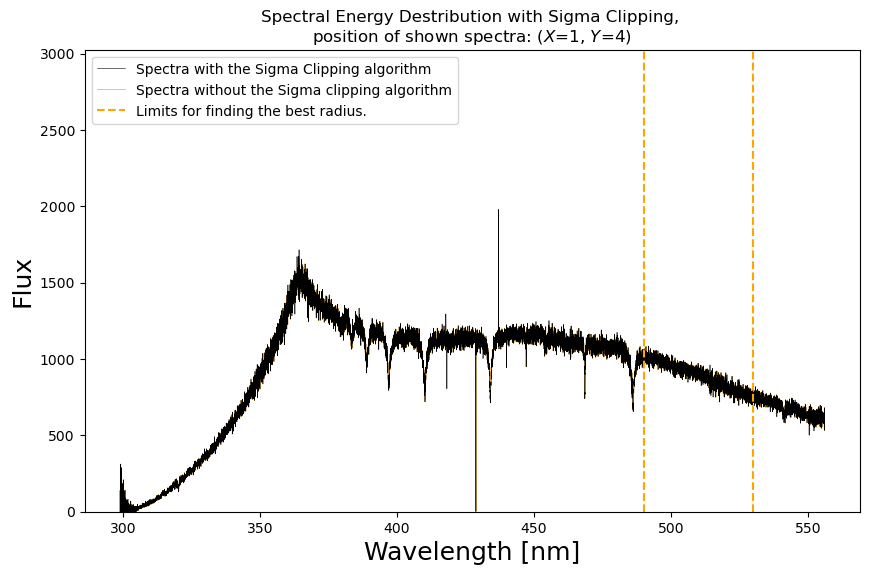

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

X = 1 # Posición horizontal del pixel que se le busca el espectro, va de 0 a 2
Y = 4 # Posición vertical del pixel que se le busca el espectro, va de 0 a 25

ylim = np.nanmedian(corrected_data[:, Y, X])*3

axes.set_title("Spectral Energy Destribution with Sigma Clipping, \nposition of shown spectra: ($X$=" + str(X) + ", $Y$=" + str(Y) + ")")
axes.plot(wave, corrected_data[:, Y, X], c="k", linewidth=.4, alpha=1, label="Spectra with the Sigma Clipping algorithm")
axes.plot(wave, clean_data[:, Y, X], c="orange", linewidth=.5, alpha=1, label="Spectra without the Sigma clipping algorithm", zorder=-10)
axes.vlines(lower_limit, 0, ylim, linestyle="--", color="orange", label="Limits for finding the best radius.")
axes.vlines(upper_limit, 0, ylim, linestyle="--", color="orange")
axes.set_ylabel("Flux", fontsize=18)
axes.set_xlabel("Wavelength [nm]", fontsize=18)

axes.set_ylim(-1, ylim)

axes.grid(False)

axes.legend(loc='upper left')

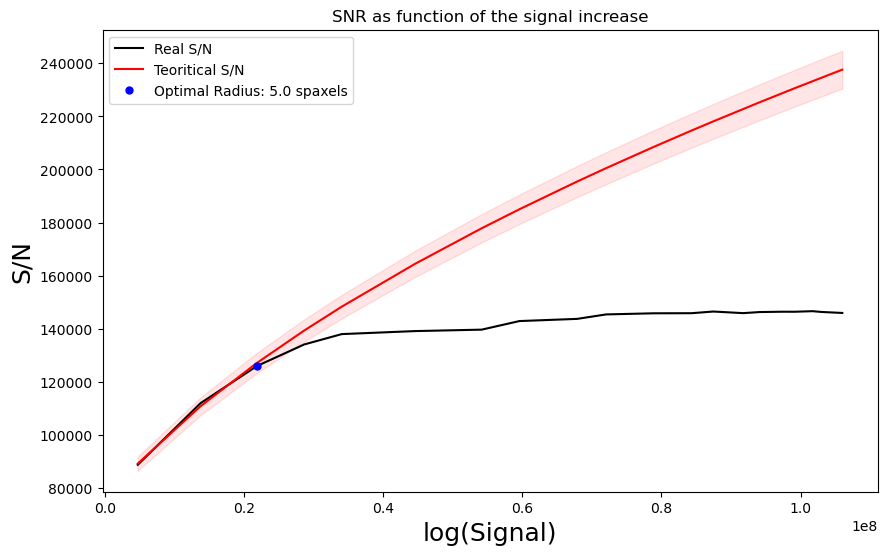

 
Optimal radius (arcsec):  0.5884085500991628
Number of spaxels inside the optimal radius:  5.0


In [31]:
    radius, radius_spaxels = di.optimal_radius_selection_IFU(" ", 
                                                          center, 
                                                          lower_limit, 
                                                          upper_limit, 
                                                          data=clean_data, 
                                                          wave=wave, 
                                                          percentage=25, 
                                                          error=3,
                                                          dim_x=dx*(pix_x + 1), 
                                                          dim_y=dy*(pix_y + 1))

In [32]:
final_data, wave = di.Disk_integrate(" ", 
                                     center, 
                                     radius, 
                                     data=clean_data, 
                                     wave=wave, 
                                     dim_x=dx*(pix_x + 1), 
                                     dim_y=dy*(pix_y + 1))

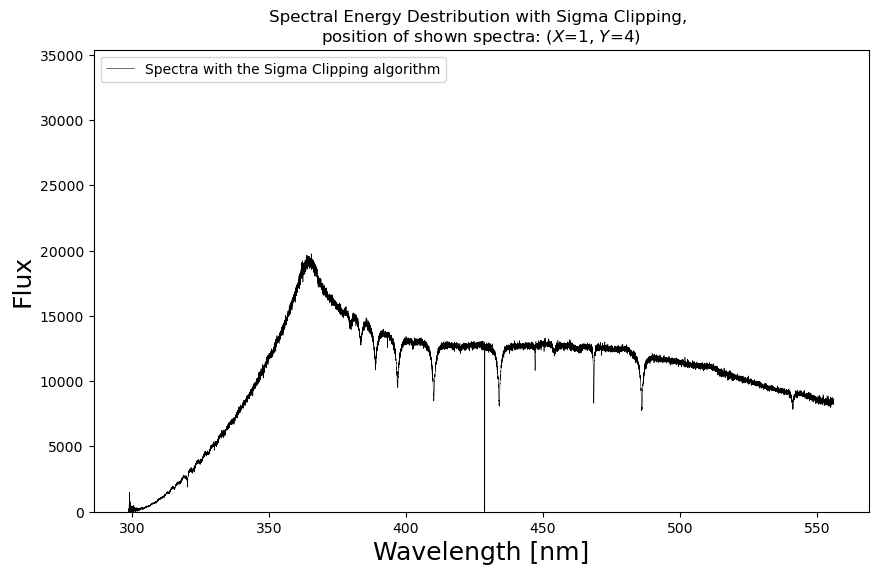

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

X = 1 # Posición horizontal del pixel que se le busca el espectro, va de 0 a 2
Y = 4 # Posición vertical del pixel que se le busca el espectro, va de 0 a 25

ylim = np.nanmedian(final_data)*3

axes.set_title("Spectral Energy Destribution with Sigma Clipping, \nposition of shown spectra: ($X$=" + str(X) + ", $Y$=" + str(Y) + ")")
axes.plot(wave, final_data, c="k", linewidth=.4, alpha=1, label="Spectra with the Sigma Clipping algorithm")
axes.set_ylabel("Flux", fontsize=18)
axes.set_xlabel("Wavelength [nm]", fontsize=18)

axes.set_ylim(-1, ylim)

axes.grid(False)
axes.legend(loc='upper left')